In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots

In [117]:
bos = pd.read_csv('Downloads/Boston.csv', index_col=0)
bos.rename_axis('suburb')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
suburb,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [33]:
# How many rows and columns in the dataframe?
rows = bos.shape[0]
columns = bos.shape[1]
print('This dataset has {0} rows and {1} columns'.format(rows, columns))

This dataset has 506 rows and 13 columns


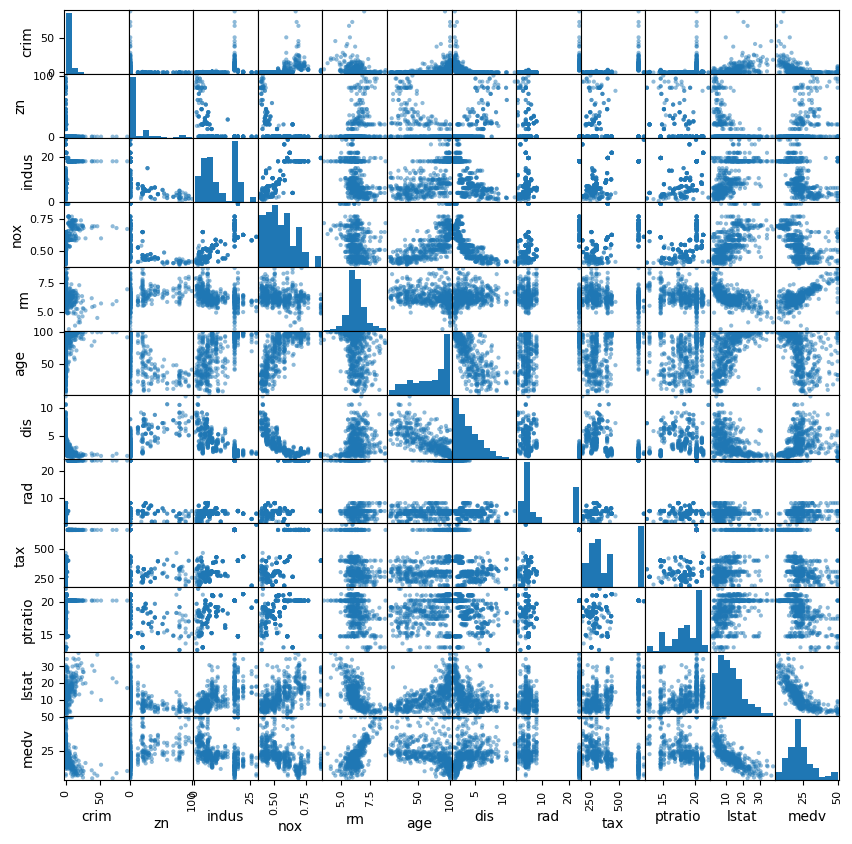

In [51]:
# Making pairwise scatterplots for quantatitive variables
quant = bos.drop('chas', axis=1)
pd.plotting.scatter_matrix(quant, figsize=(10,10));

In [41]:
corr = quant.corr() #for numerical confirmation
corr.style.background_gradient(cmap='coolwarm')

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
nox,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536
ptratio,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787


In [39]:
#Highest crimes rates, tax rates and pupil-teacher ratios
vars = ['crim', 'tax', 'ptratio']

for var in vars:
    sorted_var = bos.loc[:,var].sort_values(ascending=False)
    print(pd.DataFrame(sorted_var))

         crim
381  88.97620
419  73.53410
406  67.92080
411  51.13580
415  45.74610
..        ...
56    0.01311
342   0.01301
286   0.01096
285   0.00906
1     0.00632

[506 rows x 1 columns]
     tax
493  711
492  711
491  711
490  711
489  711
..   ...
122  188
121  188
126  188
125  188
354  187

[506 rows x 1 columns]
     ptratio
355     22.0
356     22.0
136     21.2
128     21.2
137     21.2
..       ...
268     13.0
269     13.0
198     12.6
199     12.6
197     12.6

[506 rows x 1 columns]


In [25]:
# Calculating each predictors' range
ranges = []
for var in quant.columns:
    range_value = quant[var].max() - quant[var].min()
    ranges.append([var, range_value])
# Create a DataFrame for better formatting
range_df = pd.DataFrame(ranges, columns=['Variable', 'Range']).transpose()
range_df

,0,1,2,3,4,5,6,7,8,9,10,11
Variable,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
Range,88.96988,100.0,27.28,0.486,5.219,97.1,10.9969,23.0,524.0,9.4,36.24,45.0


In [19]:
# How many of the suburbs set bound the Charles river?
print('There are' ,np.sum(bos['chas'] == 1, axis = 0), 'suburbs bound to the charles river')

There are 35 suburbs bound to the charles river


In [17]:
# What is the median pupil-teacher ratio among the towns?
print('The median pupil-teacher ratio among the towns is {0}'.format(np.median(bos['ptratio'])))

The median pupil-teacher ratio among the towns is 19.05


In [103]:
# Which suburb of Boston has lowest median value of owner occupied homes?
low_medv = bos.sort_values('medv')
print('The suburbs with lowest median values of owner occupied homes has a median of',bos['medv'].min()) 
# Suburbs number 399 & 406 has the lowest median values of owner occupied homes
preds = []

for suburb in [398,405]:
    low_medv_pred = quant.iloc[suburb,]
    preds.append(low_medv_pred)
df = pd.DataFrame(preds)
df

The suburbs with lowest median values of owner occupied homes has a median of 5.0


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
399,38.3518,0.0,18.1,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,30.59,5.0
406,67.9208,0.0,18.1,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,22.98,5.0


In [75]:
# How many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
for val in [7,8]:
    avg_per_dwelling = bos[bos['rm'] > val].value_counts().sum()
    print('There are',avg_per_dwelling, 'suburbs with more than {0} rooms per dwelling'.format(val))

There are 64 suburbs with more than 7 rooms per dwelling
There are 13 suburbs with more than 8 rooms per dwelling
